<a href="https://colab.research.google.com/github/yellayujin/mulcamp34/blob/main/240109_Pandas(2)%2C_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Pandas] 데이터 다루기

In [ ]:
# Lemonade2016.csv

In [ ]:
import pandas as pd
df = pd.read_csv('data/Lemonade2016.csv')

## 결측치 확인

In [ ]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         31 non-null     object 
 1   Location     32 non-null     object 
 2   Lemon        32 non-null     int64  
 3   Orange       32 non-null     int64  
 4   Temperature  32 non-null     int64  
 5   Leaflets     31 non-null     float64
 6   Price        32 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


In [ ]:
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25


In [ ]:
df.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354688
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


In [ ]:
df.isna().sum(axis=0)

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [ ]:
df['Location'].value_counts()

Beach    17
Park     15
Name: Location, dtype: int64

## 중복값 다루기

In [ ]:
# 중복값 유무 확인
df.loc[df.duplicated()]  # 중복값의 위치 확인

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,7/6/2016,Beach,103,69,82,90.0,0.25


In [ ]:
df.duplicated().sum(axis=0)  # 중복값의 총 갯수 확인

1

In [ ]:
df = df.drop_duplicates(ignore_index=True)   # 중복값 제거, 빠진 인덱스 무시하고 인덱스 재정렬
   # inplace옵션도 있음
df.duplicated().sum()

0

## 행과 열 다루기


In [ ]:
df['Sold'] = 0
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sold,매출액
0,7/1/2016,Park,97,67,70,90.0,0.25,0,41.00
1,7/2/2016,Park,98,67,72,90.0,0.25,0,41.25
2,7/3/2016,Park,110,77,71,104.0,0.25,0,46.75
3,7/4/2016,Beach,134,99,76,98.0,0.25,0,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.25,0,69.25


In [ ]:
df['Sold'] = df['Lemon'] + df['Orange']
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sold,매출액
0,7/1/2016,Park,97,67,70,90.0,0.25,164,41.00
1,7/2/2016,Park,98,67,72,90.0,0.25,165,41.25
2,7/3/2016,Park,110,77,71,104.0,0.25,187,46.75
3,7/4/2016,Beach,134,99,76,98.0,0.25,233,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.25,277,69.25
5,7/6/2016,Beach,103,69,82,90.0,0.25,172,43.00
6,7/7/2016,Beach,143,101,81,135.0,0.25,244,61.00
7,NaN,Beach,123,86,82,113.0,0.25,209,52.25
8,7/9/2016,Beach,134,95,80,126.0,0.25,229,57.25
9,7/10/2016,Beach,140,98,82,131.0,0.25,238,59.50


In [ ]:
df['매출액'] = df['Price'] * df['Sold']

In [ ]:
# 컬럼 제거(위 코드)

In [ ]:
# 행 추출(복습)
df.loc[df['Location']=='Beach',:]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sold,매출액
3,7/4/2016,Beach,134,99,76,98.0,0.25,233,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.25,277,69.25
5,7/6/2016,Beach,103,69,82,90.0,0.25,172,43.00
6,7/7/2016,Beach,143,101,81,135.0,0.25,244,61.00
7,NaN,Beach,123,86,82,113.0,0.25,209,52.25
8,7/9/2016,Beach,134,95,80,126.0,0.25,229,57.25
9,7/10/2016,Beach,140,98,82,131.0,0.25,238,59.50
10,7/11/2016,Beach,162,120,83,135.0,0.25,282,70.50
11,7/12/2016,Beach,130,95,84,99.0,0.25,225,56.25
12,7/13/2016,Beach,109,75,77,99.0,0.25,184,46.00


In [ ]:
# 데이터 정렬, sort_values()
df = df.sort_values(by=['매출액'])

## GroupBy 연산
- SQL의 Group By와 로직 동일
- Groupby 기준컬럼: 패턴이 있는 문자열
- Groupby 대상 컬럼: 수치 데이터
- 필요한 함수: 집계함수(합, 평균 등)
- https://pandas.pydata.org/docs/user_guide/groupby.html


- dropna=True가 기본이므로 NaN데이터 제외하고 반환

In [ ]:
# 기초문법 숙달된 인원 4교시에 groupby 사이트에서 공부(저녁 과제:쭈욱 하기, 할 수 있는 것들만)

In [ ]:
df.reset_index(inplace=True)
df.head(3)

,level_0,index,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sold,매출액
0,0,0,7/1/2016,Park,97,67,70,90.0,0.25,164,41.00
1,1,1,7/2/2016,Park,98,67,72,90.0,0.25,165,41.25
2,2,5,7/6/2016,Beach,103,69,82,90.0,0.25,172,43.00


In [ ]:
df.groupby('Location')['매출액'].agg(['sum'])

,sum
Location,
Beach,959.8
Park,1178.2


In [ ]:
df.groupby('Location')['매출액'].agg(['sum', 'mean', 'std'])

,sum,mean,std
Location,,,
Beach,959.8,59.987500,13.900210
Park,1178.2,78.546667,30.013482


In [ ]:
df.groupby('Location')['매출액'].agg(['sum', 'mean', 'std']).reset_index()

,Location,sum,mean,std
0,Beach,959.8,59.987500,13.900210
1,Park,1178.2,78.546667,30.013482


In [ ]:
import numpy as np
speeds = pd.DataFrame( [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.234708,-0.483599
1,bar,one,0.836976,2.364792
2,foo,two,-0.020241,-0.454146
3,bar,three,0.788299,0.196431
4,foo,two,0.984696,0.255709
5,bar,two,0.414771,-0.720130
6,foo,one,-1.210433,-0.423966
7,foo,three,-0.720193,-1.216925


### 다중 통계량 구하기

In [ ]:
grouped = df.groupby(["A", "B"])
grouped.agg(['mean','sum'])     # .agg()를 활용하여 다중 통계량을 구할 수 있음
                                # 단일 통계량도 [ ]안에 넣어야...?

C                   D          
               mean       sum      mean       sum
A   B                                            
bar one    0.836976  0.836976  2.364792  2.364792
    three  0.788299  0.788299  0.196431  0.196431
    two    0.414771  0.414771 -0.720130 -0.720130
foo one   -0.487862 -0.975724 -0.453783 -0.907565
    three -0.720193 -0.720193 -1.216925 -1.216925
    two    0.482228  0.964455 -0.099218 -0.198437

In [ ]:
grouped.min()   # 단일로는 이렇게 써도 됨

C         D
A   B                        
bar one    0.836976  2.364792
    three  0.788299  0.196431
    two    0.414771 -0.720130
foo one   -1.210433 -0.483599
    three -0.720193 -1.216925
    two   -0.020241 -0.454146

### 인덱스 초기화
위 결과는 인덱스가 ['A']에 대함->불편하니 초기화

In [ ]:
grouped.min().reset_index()

,A,B,C,D
0,bar,one,0.836976,2.364792
1,bar,three,0.788299,0.196431
2,bar,two,0.414771,-0.720130
3,foo,one,-1.210433,-0.483599
4,foo,three,-0.720193,-1.216925
5,foo,two,-0.020241,-0.454146


### GroupBy sorting

In [ ]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
df2.groupby(["X"]).sum()

,Y
X,
A,7
B,3


In [ ]:
df2.groupby(['X'], sort=False).sum()   # 입력된 키순으로 정렬됨

,Y
X,
B,3
A,7


In [ ]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [ ]:
df3.groupby(["X"]).get_group("A")   # 'X'의 고윳값에 따라 sort후 고윳값이 'A'인 데이터 반환

,X,Y
0,A,1
2,A,3


In [ ]:
df

,A,B,C,D
0,foo,one,0.234708,-0.483599
1,bar,one,0.836976,2.364792
2,foo,two,-0.020241,-0.454146
3,bar,three,0.788299,0.196431
4,foo,two,0.984696,0.255709
5,bar,two,0.414771,-0.720130
6,foo,one,-1.210433,-0.423966
7,foo,three,-0.720193,-1.216925


In [ ]:
df.groupby("A").groups   # 변수'A'의 고윳값이 bar인 인덱스, foo인 인덱스 출력

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [ ]:
grouped = df.groupby(["A", "B"])
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [ ]:
len(grouped)    # 그룹 갯수

6

#### MultiIndex

In [ ]:
df2 = df.set_index(["A", "B"])   # 인덱스를 이중으로(MultiIndex)
df2

C         D
A   B                        
foo one    0.234708 -0.483599
bar one    0.836976  2.364792
foo two   -0.020241 -0.454146
bar three  0.788299  0.196431
foo two    0.984696  0.255709
bar two    0.414771 -0.720130
foo one   -1.210433 -0.423966
    three -0.720193 -1.216925

In [ ]:
df2 = df.set_index(["A", "B"])
grouped1 = df2.groupby(level=df2.index.names.difference(["B"]))    # level: 멀티인덱스의 경우 레벨 지정
grouped1.sum()

,C,D
A,,
bar,2.040046,1.841093
foo,-0.731462,-2.322927


In [ ]:
df2 = df.set_index(["A", "B"])
grouped100 = df2.groupby(level=df2.index.names[0])    # difference안 쓰고 인덱싱 이용(리스트 인덱싱은 df['A']처럼 안돼서 정수 이용함)
grouped100.sum()

,C,D
A,,
bar,2.040046,1.841093
foo,-0.731462,-2.322927


In [ ]:
grouped2 = df2.groupby(["A"])    # 이렇게 해도 되는데...? 어떤 원리차원 차이가 있을깡
grouped2.sum()

,C,D
A,,
bar,2.040046,1.841093
foo,-0.731462,-2.322927


In [ ]:
# MultiIndex 아닐 때로 해보기
grouped10 = df.groupby(["A"])   # A의 고윳값에 따라서 그룹화하고 인덱스도 A에 관해 자동세팅됨
grouped10.agg(['sum']).drop('B', axis=1)          # B 관한 요소는 문자열이라 sum의 의미 그닥 없으므로 지우기

,C,D
,sum,sum
A,,
bar,2.040046,1.841093
foo,-0.731462,-2.322927


In [ ]:
# MultiIndex 아닐 때로 해보기2
df10 = df.set_index(["A", "B",'C'])
df10.index.names.difference(['B'])    # FrozenList(['A', 'C'])

groupeda = df.groupby(level=df10.index.names.difference(['B'])) # Error; 이건 또 안되네?


In [ ]:
df2.index.names  # names가 약간 columns랑 비슷한 맥락인듯?

FrozenList(['A', 'B'])

In [ ]:
df2.index.names.difference(['B'])       # difference 이해 필요!
# df2.index.names의 ['B']와 인덱스가 다른 것만 가져옴...? 여태 잘 써본 적은 없음(특정한 것에서의 차이 알고싶을 때 사용)

# https://pandas.pydata.org/docs/reference/api/pandas.Index.difference.html

FrozenList(['A'])

## Pivot table
- https://wikidocs.net/46755

# Plotly
- Graph Objects(Low Level Interface) vs. Plotly Express(High Level Interface)
- Matplotlib vs. Seaborn관계와 유사(전자는 세부 커스터마이징, 후자는 간단직관)

- https://wikidocs.net/185024
- Interactive 한 시각화 가능하여 사용자가 시각화된 그래프를 쉽게 줌인, 줌아웃 및 툴팁을 활용한 데이터확인이 가능합니다. (Matplotlib/Seaborn 과의 가장 큰 차이점)
- Dash, 및 chart Studio 와같은 visualisation tools 연동으로 Web 및 application 통해 확인이 가능합니다.
- matplotlib 대비 코드가 훨씬 간편합니다.(이 책을 통해 익숙해진다면..)
- Matplotlib 차트를 Plotly 차트로 변환하는 기능 지원
- Pandas와의 호환 기능이 추가되어 판다스 plotting 백엔드에 Plotly를 설정하면 Padas 데이터프레임에서 바로 Plotly 로 시각화가 가능

### Caution
- plotly 주요 클래스 중 Figure Factory는 deprocated되는 중이므로 skip하세요
- 시각화 도구(Matplotlib, (Seaborn,) Plotly) 중 어떤 것을 사용할지 결정해야
    + 둘 다 중요한데 지금은 세미프로젝트까지 시간이 없으므로 결정하라는 의미

In [ ]:
!pip install plotly

^C


In [ ]:
import plotly
plotly.__version__

'5.9.0'

In [ ]:
# 아래 셀 부분이 안 돌아가면 이 코드 실행해보기
import plotly.io as pio
pio.renderers   # 아래 각 환경들에 따라 세팅해줘야할수도

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
pio.renderers.default = 'jupyterlab'   # jupyterlab 자리에 각 환경 넣어보기

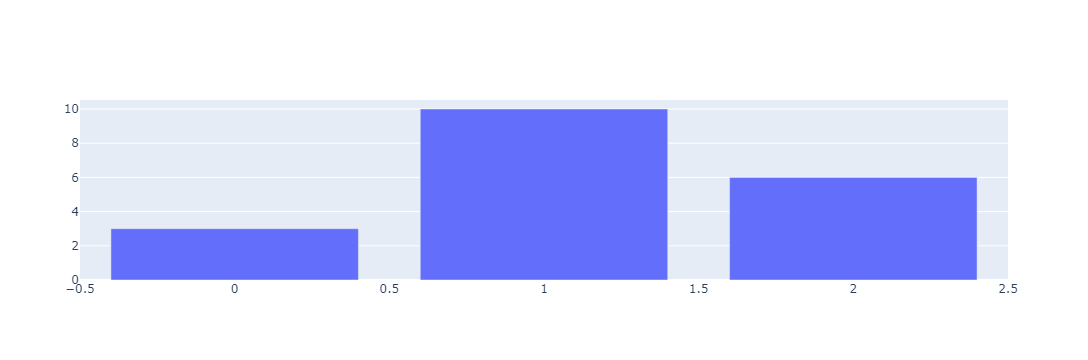

In [ ]:
import plotly.graph_objects as go

# 데이터 불러오기
y=[3, 10, 6]
fig = go.Figure(
    data = [go.Bar(y=y)])

fig.show()

## Kaggle 설문조사 데이터

In [ ]:
# 갖고 있는 파일 목록, 경로 확인
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\kaggle-survey-2019\multiple_choice_responses.csv
./kaggle/input\kaggle-survey-2019\other_text_responses.csv
./kaggle/input\kaggle-survey-2019\questions_only.csv
./kaggle/input\kaggle-survey-2019\survey_schema.csv
./kaggle/input\kaggle-survey-2020\kaggle_survey_2020_responses.csv
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_answer_choices.pdf
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_methodology.pdf
./kaggle/input\kaggle-survey-2021\kaggle_survey_2021_responses.csv
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_answer_choices.pdf
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_methodology.pdf


In [ ]:
# 데이터 불러오기: 2021년 설문조사 데이터
df = pd.read_csv('./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df

C:\Users\skrtk\AppData\Local\Temp\ipykernel_14980\1263642687.py:2: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.



,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Q = df.iloc[0,:]
df = df.iloc[1:,:]      # df.columns = Q로 하면 변수 이름 쓰기 귀찮아짐
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,MLflow,NaN,NaN
7,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,484,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Q25'].value_counts()   # 고윳값 너무 많아! 그룹화 진행해야

$0-999              3368
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        550
25,000-29,999        469
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: Q25, dtype: int64

### GroupBy 사용

In [ ]:
df['Q1'].value_counts()

25-29    4931
18-21    4901
22-24    4693
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     962
55-59     592
60-69     553
70+       128
Name: Q1, dtype: int64

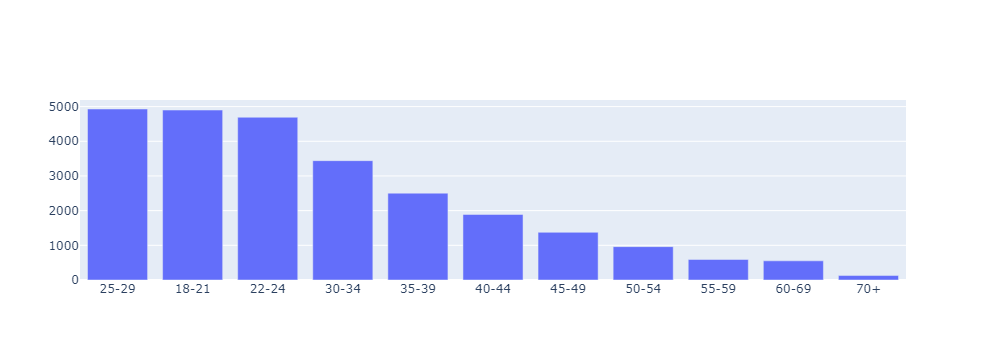

In [ ]:
# Graph Object방식으로(옵션 수정 위해) 진행했음
# Q1 막대그래프
# 위 결괏값을 q1_df로 저장
q1_df = df['Q1'].value_counts()

fig =  go.Figure()
fig.add_trace(
    # 시각화 종류
    go.Bar(x=q1_df.index, y = q1_df.values))  # 시각화 차트 생성

fig.show()

In [ ]:
# 위 시각화의 문제점
# 나이 구간 간격이 제각각 (잼민, 20초, 20후, 30초, 30후 관점이면 낫배드)
# 각 수치가 정확히 표시되어있지 않음
# 인덱스가 순서대로가 아님


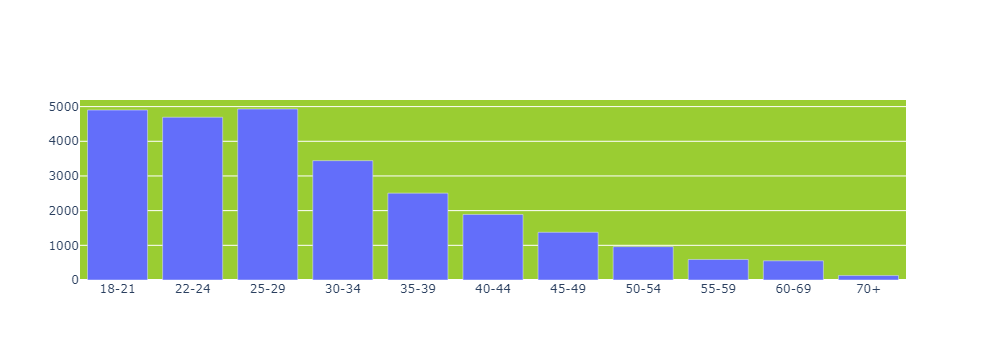

In [ ]:
q1_df = df['Q1'].value_counts()

CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]

fig =  go.Figure()
fig.add_trace(
    # 시각화 종류
    go.Bar(x=q1_df.index, y = q1_df.values))  # 시각화 차트 생성

# 시각화 스타일 변경
fig.update_layout(xaxis= dict(categoryorder='array', categoryarray=CATEGORY_ORDER),
                 plot_bgcolor='yellowgreen')    # 딕셔너리 형태로 넣어줘야

fig.show()

In [ ]:
q1_q2_df = df.loc[:, ["Q1", "Q2"]].replace({'Prefer not to say':'etc', 'Nonbinary':"etc", "Prefer to self-describe": "etc"})
q1_q2_df['Q2'].value_counts()

Man      20595
Woman     4890
etc        485
Name: Q2, dtype: int64

In [ ]:
q1_q2_df = q1_q2_df.groupby(['Q2','Q1']).size().reset_index().rename(columns = {0:"Count"})
q1_q2_df.head()

,Q2,Q1,Count
0,Man,18-21,3696
1,Man,22-24,3642
2,Man,25-29,3859
3,Man,30-34,2765
4,Man,35-39,1993


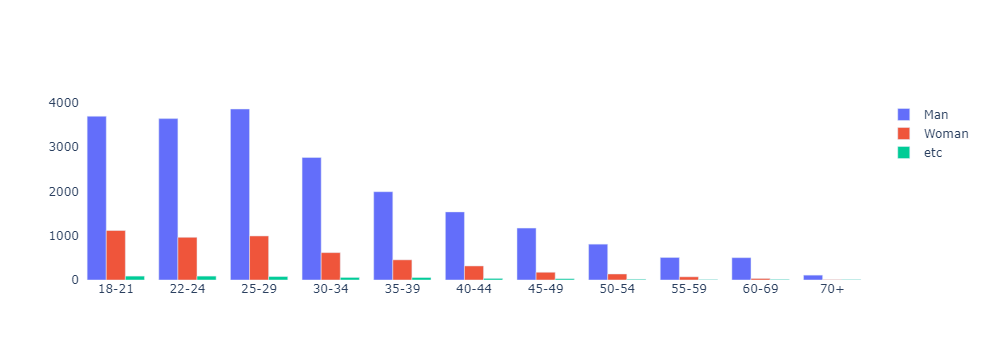

In [ ]:
fig = go.Figure()
for gender, group in q1_q2_df.groupby('Q2'):
    # print(gender, group)
    fig.add_trace(go.Bar(x=group['Q1'], y=group['Count'], name=gender))       # Man-> Woman-> etc 순서로 그림

fig.update_layout(plot_bgcolor='white')

fig.show()

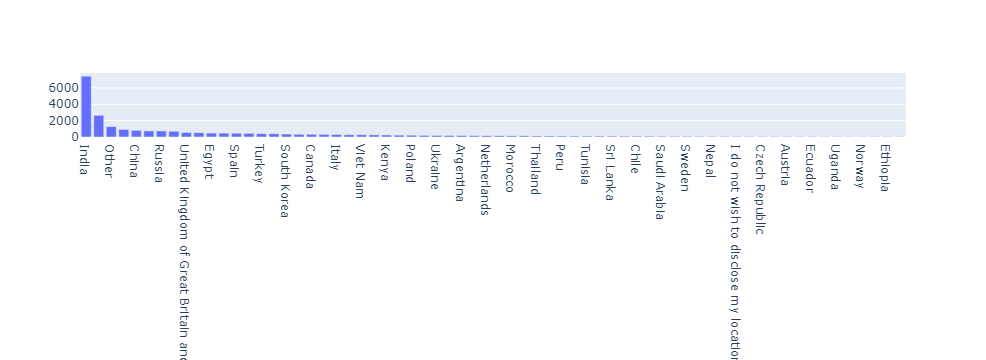

In [ ]:
q3_df = df['Q3'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x = q3_df.index, y = q3_df.values))
fig.show()

In [ ]:
q3_q25 = df.loc[:, ['Q3', 'Q25']]
q3_q25.head(3)

,Q3,Q25
4,Mexico,"30,000-39,999"
5,India,"30,000-39,999"
6,India,NaN


In [ ]:
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'].value_counts()

$0-1,999            4337
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        550
25,000-29,999        469
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: Q25, dtype: int64

In [ ]:
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['2,000-2,999', '3,000-3,999'], '$2,000-3,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['4,000-4,999', '5,000-7,499'], '$4,000-7,499')
q3_q25['Q25'] = q3_q25['Q25'].replace(['25,000-29,999', '60,000-69,999',
                       '30,000-39,999','15,000-19,999', '70,000-79,999',
                       '10,000-14,999', '20,000-24,999', '7,500-9,999',
                       '100,000-124,999', '40,000-49,999', '50,000-59,999',
                       '300,000-499,999', '200,000-249,999', '125,000-149,999',
                       '250,000-299,999', '80,000-89,999', '90,000-99,999',
                       '150,000-199,999', '>$1,000,000', '$500,000-999,999'], '$7,500+')

q3_q25['Q25'].value_counts()

$7,500+         8941
$0-1,999        4337
$4,000-7,499    1155
$2,000-3,999     955
Name: Q25, dtype: int64

In [ ]:
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15388 entries, 4 to 25973
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      15388 non-null  object
 1   Q25     15388 non-null  object
dtypes: object(2)
memory usage: 360.7+ KB


In [ ]:
q3_q25 = q3_q25.groupby(['Q3','Q25']).size().reset_index().rename(columns = {0:"Count"})
q3_q25

,Q3,Q25,Count
0,Algeria,"$0-1,999",14
1,Algeria,"$2,000-3,999",1
2,Algeria,"$4,000-7,499",3
3,Algeria,"$7,500+",5
4,Argentina,"$0-1,999",34
...,...,...,...
254,United States of America,"$7,500+",1669
255,Viet Nam,"$0-1,999",86
256,Viet Nam,"$2,000-3,999",15
257,Viet Nam,"$4,000-7,499",15


In [ ]:
q3_q25 = q3_q25.dropna()
q3_q25['Q3'].value_counts()

Algeria       4
Kenya         4
Mexico        4
Morocco       4
Nepal         4
             ..
Italy         4
Tunisia       3
Ireland       3
Kazakhstan    3
Norway        2
Name: Q3, Length: 66, dtype: int64

In [ ]:
india_df = q3_q25.loc[q3_q25['Q3']=='India', :].reset_index(drop=True)
usa_df = q3_q25.loc[q3_q25['Q3']=='United States of America', :].reset_index(drop=True)
# 데이터 눈으로 확인하는 습관 들여야 reset_index(drop=True)붙이는 습관 들 것

print(india_df.shape[0], usa_df.shape[0])     # 맞게 잘 했는지 확인

4 4


In [ ]:
india_df

,Q3,Q25
0,India,"$7,500+"
1,India,"$7,500+"
2,India,"$7,500+"
3,India,"$7,500+"
4,India,"$0-1,999"
...,...,...
3370,India,"$0-1,999"
3371,India,"$0-1,999"
3372,India,"$0-1,999"
3373,India,"$2,000-3,999"


In [ ]:
india_df['Percentage'] = np.round((india_df['Count'] / india_df['Count'].sum()) * 100, 2)
india_df

,Q3,Q25,Count,Percentage
0,India,"$0-1,999",1214,35.97
1,India,"$2,000-3,999",239,7.08
2,India,"$4,000-7,499",451,13.36
3,India,"$7,500+",1471,43.59


In [ ]:
usa_df['Percentage'] = np.round((usa_df['Count'] / usa_df['Count'].sum()) * 100, 2)
usa_df

,Q3,Q25,Count,Percentage
0,United States of America,"$0-1,999",140,7.59
1,United States of America,"$2,000-3,999",19,1.03
2,United States of America,"$4,000-7,499",17,0.92
3,United States of America,"$7,500+",1669,90.46


In [ ]:
data = pd.concat([india_df, usa_df]).reset_index()
data

,index,Q3,Q25,Count,Percentage
0,0,India,"$0-1,999",1214,35.97
1,1,India,"$2,000-3,999",239,7.08
2,2,India,"$4,000-7,499",451,13.36
3,3,India,"$7,500+",1471,43.59
4,0,United States of America,"$0-1,999",140,7.59
5,1,United States of America,"$2,000-3,999",19,1.03
6,2,United States of America,"$4,000-7,499",17,0.92
7,3,United States of America,"$7,500+",1669,90.46


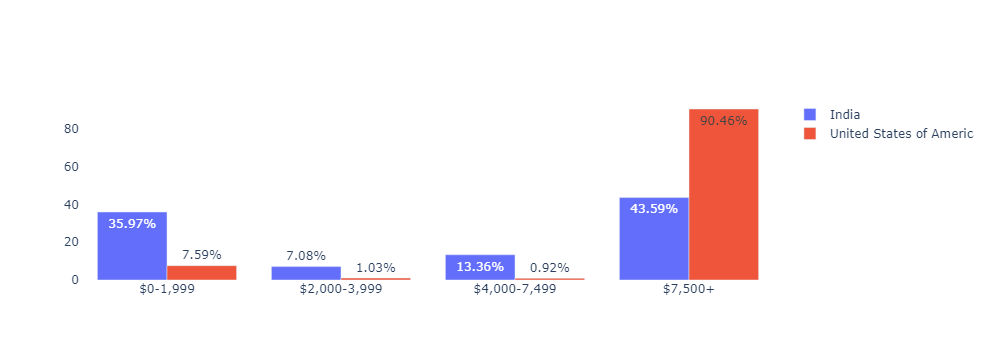

In [ ]:
fig = go.Figure()
for country, group in data.groupby('Q3'):
    # print(gender, group)
    fig.add_trace(go.Bar(x=group['Q25'], y=group['Percentage'], name=country, text = group['Percentage'].astype(str) + "%",
                  textposition='auto'))      # text이하는 막대에 숫자 넣기위함

fig.update_layout(plot_bgcolor='white')

fig.show()

In [ ]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


### Express 방식으로 막대그래프 그리기
- 커스텀 어려움

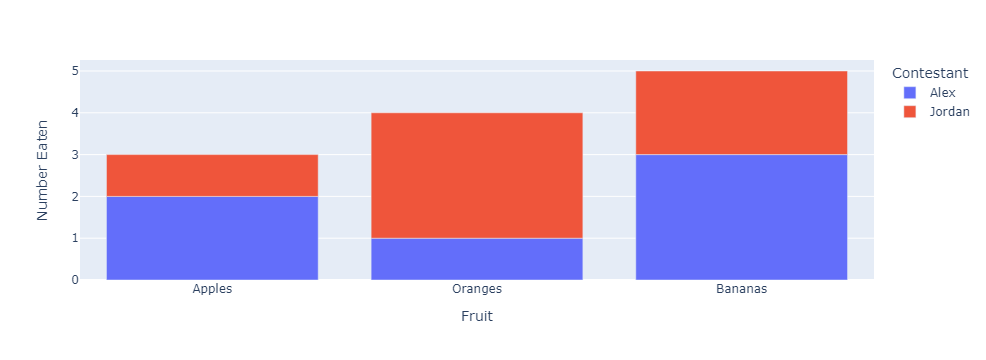

In [ ]:
import plotly.express as px
fig = px.bar(temp, x='Fruit', y='Number Eaten', color = 'Contestant')    # barmode X (누적됨)
fig.show()

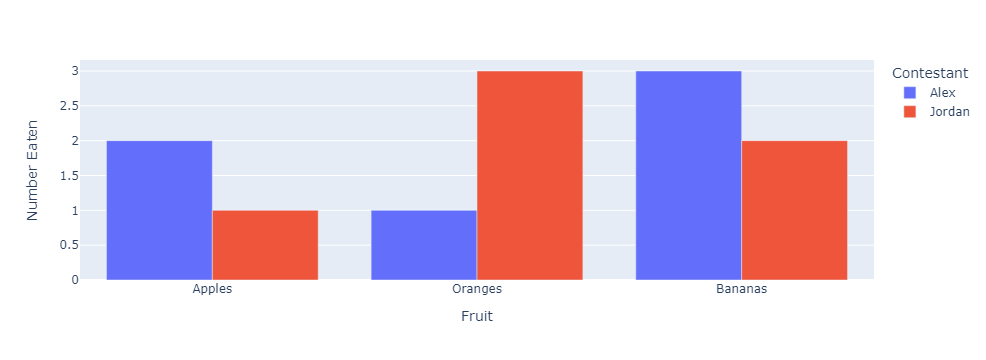

In [ ]:
import plotly.express as px
fig = px.bar(temp, x='Fruit', y='Number Eaten', color = 'Contestant', barmode='group')    # barmode O
fig.show()

In [ ]:
# 샘플 데이터로 해보기
long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


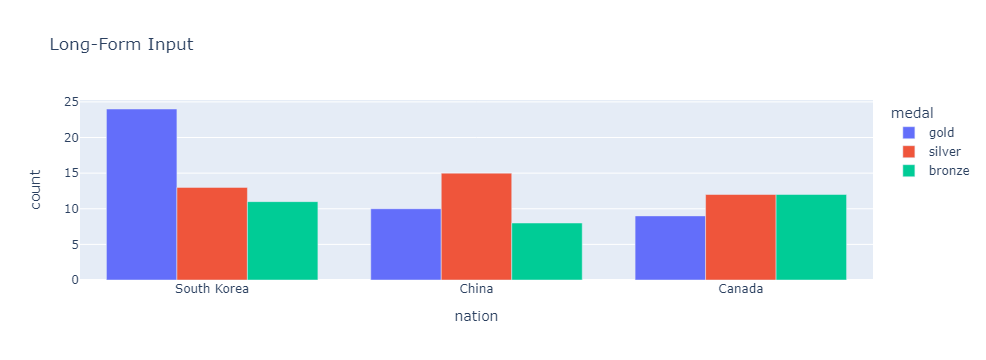

In [ ]:
fig = px.bar(long_df, x='nation', y='count', color = 'medal',
             barmode='group', title='Long-Form Input')
fig.show()

### Graph Object방식으로 그리기

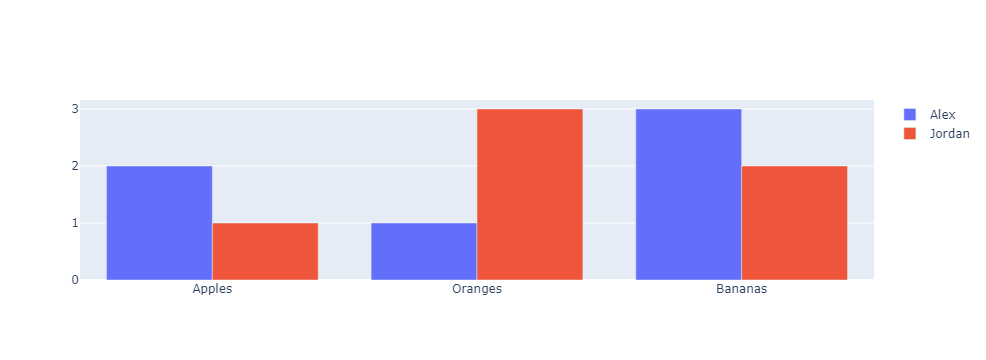

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show(json)   # 뭘 임포트해야하는지는 모르겠지만 구조 확인 가능

# 시험 관련 안내
- 교재 2권 기준, SQL은 제외
- 어느 챕터 보라고 알려줄 예정
- 17일(수), 13:00~13:30, 10문제